In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
# Class that will help us to stop the training of the model when reaching certain accuracy
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.998):
      print("\nReached 99.8% accuracy so cancelling training!")
      self.model.stop_training = True

# Getting the data

In [3]:
# The Fashion MNIST data is available directly in the tf.keras datasets API. We can load it 
# like this:
mnist = tf.keras.datasets.fashion_mnist

In [4]:
# Calling load_data on this object will give you two sets of two lists, these will be the 
# training and testing values for the graphics that contain the clothing items and their 
#labels.
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

# Visualizing data

In [5]:
# Let's print a training image, and a training label to see
np.set_printoptions(linewidth=200)

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 

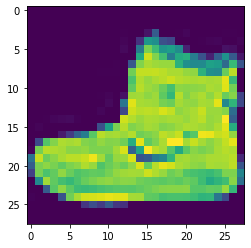

In [6]:
plt.imshow(training_images[0])
print(training_labels[0])
print(training_images[0])

# Model 1: Simple Neural Network

### Reshaping the data

In [7]:
# You'll notice that all of the values in the number are between 0 and 255. If we are training
# a neural network, for various reasons it's easier if we treat all values as between 0 and 1,
# a process called 'normalizing'...and fortunately in Python it's easy to normalize a list 
# like this without looping. You do it like this:

training_images_m1  = training_images / 255.0
test_images_m1 = test_images / 255.0

In [8]:
callbacks = myCallback()

### Model

#### If you remove the Flatten() layer, you get an error about the shape of the data. The first layer in your network should be the same shape as your data. Right now our data is 28x28 images, and 28 layers of 28 neurons would be infeasible, so it makes more sense to 'flatten' that 28,28 into a 784x1. Instead of writing all the code to handle that ourselves, we add the Flatten() layer at the begining, and when the arrays are loaded into the model later, they'll automatically be flattened for us.

In [9]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

##### The number of neurons in the last layer should match the number of classes you are classifying for. In this case it's the digits 0-9, so there are 10 of them, hence you should have 10 neurons in your final layer.

##### Sequential: That defines a SEQUENCE of layers in the neural network
##### Flatten: Our images are a square, so this turns it into a 1 dimensional set.
##### Dense: Adds a layer of neurons. Each layer of neurons need an activation function to tell them what to do. 
##### Relu effectively means "If X>0 return X, else return 0" -- so what it does it it only passes values 0 or greater to the next layer in the network.
##### Softmax takes a set of values, and effectively picks the biggest one, so, for example, if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], it saves you from fishing through it looking for the biggest value, and turns it into [0,0,0,0,1,0,0,0,0] 


### Building and training model

In [10]:
# Building model: You do this by compiling it with an optimizer and loss function, and then
# Training the model: You do it by calling *model.fit * asking it to fit your training data
# to your training labels -- i.e. have it figure out the relationship between the training 
# data and its actual labels.

model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images_m1, training_labels, epochs=15, callbacks=[callbacks])

Epoch 1/15
1875/1875 [==============================] - 14s 7ms/step - loss: 0.4700 - accuracy: 0.8304
Epoch 2/15
1875/1875 [==============================] - 16s 8ms/step - loss: 0.3559 - accuracy: 0.8699
Epoch 3/15
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3198 - accuracy: 0.8818
Epoch 4/15
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2956 - accuracy: 0.8894
Epoch 5/15
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2773 - accuracy: 0.8964
Epoch 6/15
1872/1875 [============================>.] - ETA: 0s - loss: 0.2623 - accuracy: 0.9010
Reached 90% accuracy so cancelling training!
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2622 - accuracy: 0.9010


#### By adding more Neurons we can increase the accuracy of our model. However, we have to do more calculations, slowing down the process. That doesn't mean it's always a case of 'more is better', you can hit the law of diminishing returns very quickly!

##### Consider the impact of training for more or less epochs. Increassing the number of epoch can decrease the loss but also could decrease it at first and then stop decreasing it, and sometimes increase it. This is a side effect of 'overfitting' .

### Evaluating model

In [11]:
#But how would it work with unseen data? That's why we have the test images. We can call model.
#evaluate, and pass in the two sets, and it will report back the loss for each. Let's give it
#a try:

model.evaluate(test_images_m1, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.3307 - accuracy: 0.8846


[0.3307439088821411, 0.8845999836921692]

In [12]:
# We will create a set of classifications for each of the test images, and then prints the first 
# entry in the classifications(the output, after you run it is a list of numbers). 

classifications = model.predict(test_images_m1)

print(classifications[0])

[2.8132391e-07 1.8716362e-06 2.1286174e-07 3.5237636e-07 2.0736456e-06 9.1537913e-05 6.4358852e-07 1.0048633e-02 1.6063574e-05 9.8983836e-01]


#####  The output of the model is a list of 10 numbers. These numbers are a probability that the value being classified is the corresponding value, i.e. the first value in the list is the probability that the image is of a '0' (T-shirt/top), the next is a '1' (Trouser) etc.  Notice that they are all VERY LOW probabilities. For the 9 (Ankle boot), the probability was in the 90's, i.e. the neural network is telling us that it's almost certainly.

In [13]:
print(test_labels[0])

9


#### With Model 1 the best accuracy that we reach was about 90% on training and 80% on validation, not bad. But how do you make that even better? One way is to use something called Convolutions. 

# Model 2: Neural Network with Convolution and Pooling

### Reshaping data

##### There's a bit of a change here, the training data needed to be reshaped. That's because the first convolution expects a single tensor containing everything, so instead of 60,000 28x28x1 items in a list, we have a single 4D list that is 60,000x28x28x1, and the same for the test images. If you don't do this, you'll get an error when training as the Convolutions do not recognize the shape.

In [18]:
training_images_m2 = training_images.reshape(60000, 28, 28, 1)
training_images_m2 = training_images_m2 / 255.0
test_images_m2 = test_images.reshape(10000, 28, 28, 1)
test_images_m2=test_images_m2/255.0

### Model

##### Next is to define your model. Now instead of the input layer at the top, you're going to add a Convolution. The parameters are:
a) The number of convolutions you want to generate. Purely arbitrary, but good to start with something in the order of 32. In our case we use 64.

b) The size of the Convolution, in this case a 3x3 grid

c) The activation function to use. 

##### We follow the Convolution with a MaxPooling layer which is then designed to compress the image, while maintaining the content of the features that were highlighted by the convlution. By specifying (2,2) for the MaxPooling, the effect is to quarter the size of the image. 

##### model.summary() allow you to see the size and shape of the network. Notice that after every MaxPooling layer, the image size is reduced in this way.

In [19]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  #tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  #tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

### Building and training model

In [20]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_4 (Dense)              (None, 10)               

In [23]:
model.fit(training_images_m2, training_labels, epochs=10, callbacks=[callbacks])

Epoch 1/5
1875/1875 [==============================] - 60s 32ms/step - loss: 0.4399 - accuracy: 0.8390
Epoch 2/5
1875/1875 [==============================] - 67s 35ms/step - loss: 0.2931 - accuracy: 0.8924
Epoch 3/5
1875/1875 [==============================] - 65s 35ms/step - loss: 0.2488 - accuracy: 0.9088
Epoch 4/5
1875/1875 [==============================] - 67s 36ms/step - loss: 0.2165 - accuracy: 0.9195
Epoch 5/5
1875/1875 [==============================] - 63s 34ms/step - loss: 0.1883 - accuracy: 0.9299


### Evaluating model

In [25]:
model.evaluate(test_images_m2, test_labels)

313/313 [==============================] - 3s 9ms/step - loss: 0.2644 - accuracy: 0.9039


[0.26440829038619995, 0.9039000272750854]

# Visualizing the convolution

##### This code will show us the convolutions graphically. The print (test_labels[;100]) shows us the first 100 labels in the test set, and you can see that the ones at index 0, index 23 and index 28 are all the same value (9). They're all shoes. Let's take a look at the result of running the convolution on each, and you'll begin to see common features between them emerge. Now, when the DNN is training on that data, it's working with a lot less, and it's perhaps finding a commonality between shoes based on this convolution/pooling combination.

In [26]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4
 2]


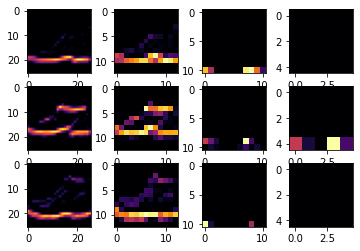

In [28]:
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 1
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)